In [1]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [25]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov9'...


In [30]:
cd yolov5

C:\Users\jainh\OneDrive\Desktop\yolov5


In [27]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorboard>=2.4.1 from https://files.pythonhosted.org/packages/d4/41/dccba8c5f955bc35b6110ff78574e4e5c8226ad62f08e732096c3861309b/tensorboard-2.17.1-py3-none-any.whl.metadata
  Obtaining dependency information for albumentations>=1.0.3 from https://files.pythonhosted.org/packages/1e/64/27ecc9a9d0861e401c3fea4dc67ac9425d7a29e2ba48518d449618999601/albumentations-1.4.14-py3-none-any.whl.metadata
  Obtaining dependency information for pycocotools>=2.0 from https://files.pythonhosted.org/packages/2e/f5/dfa78dc72e47dfe1ada7b37fedcb338454750470358a6dfcfdfda35fa337/pycocotools-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=0.4 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for grpcio>=1.48.2 from ht

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\jainh\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.3/38.8 MB 2.0 MB/s eta 0:00:03
   ---------------------------------- ----- 33.7/38.8 MB 1.9 MB/s eta 0:00:03
   ---------------------------------- ----- 33.8/38.8 MB 1.8 MB/

In [5]:
import torch
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\jainh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-9-9 Python-3.11.5 torch-2.4.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
img = 'https://media.wired.com/photos/593256b42a990b06268a9e21/master/w_1920,c_limit/traffic-jam-getty.jpg'

In [8]:
results = model(img)
results.print()

C:\Users\jainh/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 684x1025 61 cars
Speed: 224.9ms pre-process, 116.9ms inference, 2.1ms NMS per image at shape (1, 3, 448, 640)


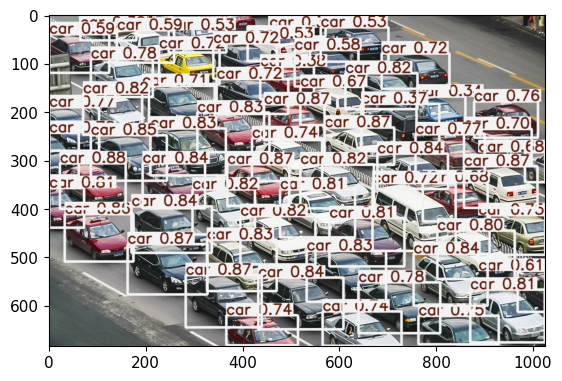

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render())) 
plt.show()

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  #make detections
  results = model(frame)

  cv2.imshow('Yolo', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

In [31]:
import uuid
import time
import os

In [52]:
cd ..

C:\Users\jainh\OneDrive\Desktop


In [53]:
print(os.getcwd())

C:\Users\jainh\OneDrive\Desktop


In [54]:
IMAGE_PATH_before_abs = os.path.join('data', 'images')
IMAGE_PATH = os.path.abspath(IMAGE_PATH_before_abs)
labels = ['awake', 'drowsey']
number_imgs = 20

In [56]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)
    
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        ret, frame = cap.read()
        imgname = os.path.join(IMAGE_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname, frame)
        cv2.imshow('Image Collection', frame)
        time.sleep(5)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [57]:
print(os.getcwd())

C:\Users\jainh\OneDrive\Desktop


In [58]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [63]:
!pip install pyqt5 lxml --upgrade

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
cd labelImg

C:\Users\jainh\OneDrive\Desktop\labelImg


In [70]:
!C:\Users\jainh\AppData\Roaming\Python\Python311\Scripts\pyrcc5.exe -o libs/resources.py resources.qrc

In [61]:
print(os.getcwd())

C:\Users\jainh\OneDrive\Desktop


In [83]:
cd C:\Users\jainh\OneDrive\Desktop

C:\Users\jainh\OneDrive\Desktop


In [86]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  v7.0-365-g12b577c8 Python-3.11.5 torch-2.4.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

In [93]:
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', source='local')

YOLOv5  2024-9-9 Python-3.11.5 torch-2.4.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [104]:
img = os.path.join('data', 'images', 'drowsey.bfa8a874-6eb0-11ef-adfa-b4b5b6f1d9fe.jpg')

In [105]:
results = model(img)

In [106]:
results.print()

image 1/1: 480x640 1 drowsey
Speed: 42.5ms pre-process, 196.4ms inference, 6.3ms NMS per image at shape (1, 3, 480, 640)


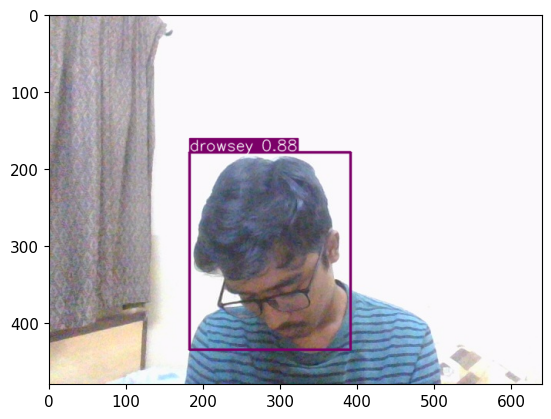

In [107]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [1]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
  ret, frame = cap.read()

  #make detections
  results = model(frame)

  cv2.imshow('Yolo', np.squeeze(results.render()))
  if cv2.waitKey(10) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined